In [176]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

In [177]:
beta = 0.05  
phi= 0.3e-10 
T_inf = 200  #K
T_0 = 300  # K
T_l = 400  # K
L = 10 # m


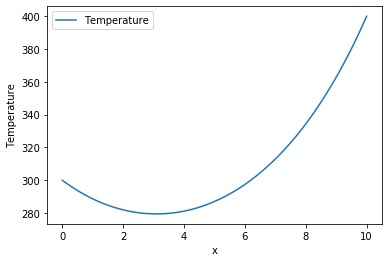

In [178]:

# Define the differential equation
def ode(x, T):
    return np.vstack((T[1], -beta*(T_inf-T[0]) + phi*(T[0]**4-T_inf**4)))

# Define the boundary conditions
def bc(Ta, Tb):
    return np.array([Ta[0]-T_0, Tb[0]-T_l])

# Define the initial guess
x = np.linspace(0, L, 100)
T_guess = np.zeros((2, x.size))
T_guess[0] = np.interp(x, [0, L], [T_0, T_l])
T_guess[1] = (T_inf-T_0)*(1-x/L) + T_0

# Solve the BVP using solve_bvp
sol = solve_bvp(ode, bc, x, T_guess)

# Plot the solution
plt.plot(sol.x, sol.y[0], label='Temperature')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.legend()
plt.show()
